#### https://github.com/codebasics/py/blob/master/ML/7_logistic_reg/7_logistic_regression.ipynb

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [2]:
from sklearn.model_selection import train_test_split

In [4]:
from sklearn.metrics import r2_score, mean_squared_error

In [5]:
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('insurance_data.csv')

In [7]:
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


In [11]:
x_train, x_test, y_train, y_test = train_test_split(df[['age']], df['bought_insurance'], test_size=0.2)

In [12]:
model = LogisticRegression()

In [13]:
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
y_predicted = model.predict(x_test)

In [15]:
model.predict_proba(x_test)

array([[0.97184723, 0.02815277],
       [0.89602464, 0.10397536],
       [0.03758109, 0.96241891],
       [0.88075726, 0.11924274],
       [0.11821919, 0.88178081],
       [0.92144908, 0.07855092]])

In [17]:
y_test[:2]

10    0
12    0
Name: bought_insurance, dtype: int64

In [18]:
y_predicted[:2]

array([0, 0], dtype=int64)

In [22]:
model.predict_proba([[36]]) # predicting for a new value directly

array([[0.68267122, 0.31732878]])

In [23]:
model.predict_proba([[84]])

array([[0.00131159, 0.99868841]])

#### https://github.com/codebasics/py/blob/master/ML/8_logistic_reg_multiclass/8_logistic_regression_multiclass.ipynb

In [24]:
from sklearn.datasets import load_digits

In [25]:
%matplotlib inline

In [26]:
digits = load_digits()

In [27]:
type(digits)

sklearn.utils.Bunch

In [38]:
digits.data[0] # data for 0th element

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

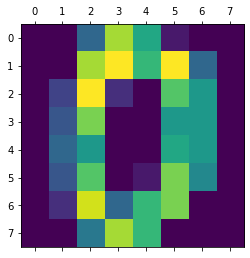

In [39]:
plt.matshow(digits.images[0]) # the corresponding representation of data for 0th element in form of an image

In [41]:
digits.target[0] # shows that the image/data at 0th element has been classified as 0 (ZERO) in the dataset

0

In [42]:
dir(digits) # see all the column names

['DESCR', 'data', 'images', 'target', 'target_names']

In [43]:
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=42)

In [44]:
model.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [45]:
model.score(x_test, y_test)

0.9694444444444444

In [46]:
y_predicted = model.predict(x_test)

In [48]:
digits.target[99] # the 99th number in the dataset is '1'

1

In [50]:
model.predict([digits.data[99]]) # our model also predicts that data for 99th element is '1'

array([1])

Actual: 9, Predicted:8
Actual: 4, Predicted:1


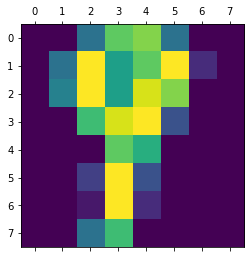

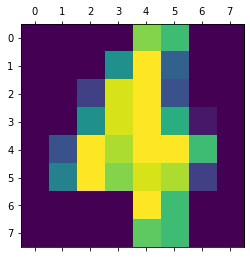

In [66]:
# some examples of where the prediction is incorrect

for i in range(0, 250):
    if digits.target[i] != model.predict([digits.data[i]])[0]:
        plt.matshow(digits.images[i])
        print(f'Actual: {digits.target[i]}, Predicted:{model.predict([digits.data[i]])[0]}')